# Section 1: Business Understanding

## Introduction

For any service it is important to monitor changes in user trends over time. By analysing changes it helps with making strategic changes to the operation of the service. These changes both improve user expierience and can help to increase user engagement with the service.

To this end stackoverflow carries out an anual survey of its user base. The survey camptures a range of information about the users. This information includes the users age, eductation and location. By looking at changes in these parameters over the last 4 years it is possible to get an indication of how the userbase has changed in this time.


## The questions we explore to further understand the data are
Q1: Change in age profile of first coding
Q2: Change in education background using stackoverflow over the years
Q3: Change in regional usage

## Sumary of findings:
https://medium.com/@jodowd_87110/trends-in-stack-overflow-user-base-from-2018-to-2021-7d08a8f17315

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import helperFunctions

In [26]:
%matplotlib inline

# Section 2: Data Understanding
Investigated 4 years worth of data (2018-2021 inclusive) to look for columns to help investigate the trends in demographics.
Looking at the common column names was insufficent as over the years many of the column names have changed (even if they are still about the same question)

In [27]:
yearsToLoad = [2018, 2019, 2020, 2021] #years of interest to be loaded
columnsToLoad = ['EdLevel', 'Age', 'Gender', 'StackOverflowVisit', 'Country']# columns of interest to be loaded

# Section 3: Data preparation


## 3.1 Handling missing data
The columns selected had very little missing data. As such it was possible to exclude the small number of misssing entries without greatly diminishing quantity of data to be analysed.

## 3.2 Load common columns
colunm names changed over the years of interest so defined. Start by loading the the data and selecting the appropriate columns. Once loaded a copy of the data is also saved in a pickle file so that the in future the data is loaded from the pickle file and so the .csv source files are not required (which means the data files are sufficently small to allow them to be committed to the repo). 

In [28]:
helper = helperFunctions.DataLoader('./multipleYears') #load data
all_dfs = helper.loadyears(yearsToLoad, columnsToLoad) # select columns of interest

Once the data is loaded aliases for the column names and topic answers are defined. This allows the code to handle the changes in column names / answer spelling changes over the years of interest.

In [29]:
dataProcess = helperFunctions.DataProcess(all_dfs, yearsToLoad, columnsToLoad)#initialise the helper class
dataProcess.age_profile_aliases() # aliases for the different age ranges
dataProcess.education_profile_aliases() # aliases for the different types of education profile
ploty = helperFunctions.Dataplotter(yearsToLoad)#helper class for visualising data

Note: in the case of countries aliases were not used. Instead the country names were searched 
for that most closesly matched a list of known country names (and associated continents)

# Q1: how has the age profile of respondants changed over last 4 years

## Q1.1 Analysis

In order to look at trends in age profile of users the users were grouped into age brackets (as otherwise there were too many age groups which made it hard to identify trends). The change in proportion (% of total) of total users which were memebers of each age bracket was then checked for each of the years of interest. 

In [30]:
dfAgeProfile = dataProcess.find_multi_year_age_profile()

## Q1.2 Visualisation

The change in user age distribution was then plotted. Also plotted is is the relative change of each user group over the period of interest. This helps to see if individual groups are changing (even if they are so small that they do not make much of an impact on the total user profile).

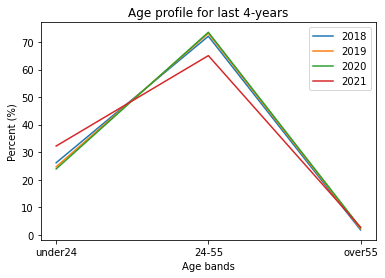

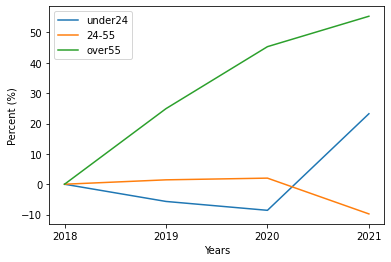

In [31]:
ploty.plot_age_profile(dfAgeProfile)

## Q1.3 Visualisation Summary
The age of users is dominated by the 24–55 age bracket. But in recent years the under 24 user bracket has increased to make up an addiational 10% of the total user base (increasing from ~26% in 2018 to ~32% in 2021). The over 55s made up <2% of the total user base in 2018. This increased by > 55% over the 4 years to bring their percentage of the total user base close to 3%.

# Q2:Change in education profile over last 4 years

## Q2.1 Analysis

Investigation of how the eduction profile of users has changed over years of interest. 
Some of the eduction types that were similar have been grouped togther for clarity

In [32]:
dfEduProfileMultiYear = dataProcess.find_multi_year_education_profile()

## Q2.2 Visualisation

The change in user education distribution was then plotted. Also plotted is is the relative change of each user group over the period of interest. This helps to see if individual groups are changing (even if they are so small that they do not make much of an impact on the total user profile).

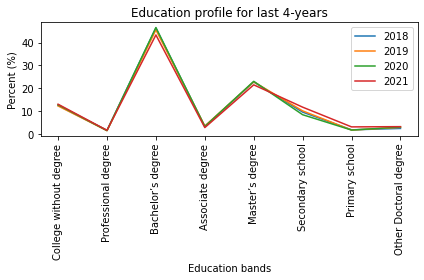

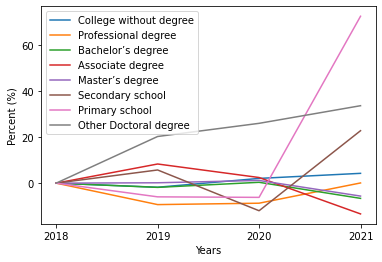

In [33]:
ploty.plot_education_profile(dfEduProfileMultiYear)

## Q2.3 Visualisation Summary

The majority of users (>60%) have either a Bachelors or a masters degree. The biggest changes in education types are towards users who have achieved finishing primary/secondary education as there education profile.

# Q3:Change in regional distribution of users over last 4 years

## Q3.1 Analysis

The geographical location of each user was investigated. In order to more clearly identify trends the users were grouped into their respective continents. 

In [34]:
dfRegionStatsMultiYear = dataProcess.find_multi_year_region_profile()

## Q3.2 Visualisation
Two different visualisations were then created. The first looked at the propotional change in each content over the 4 years of interest (i.e. to see trends like the Africa having increased its users by 23.2%). 

In [1]:
from IPython.display import SVG
def show_svg():
    """
    The output of dataProcess.find_multi_year_region_profile is an svg file
    This funtion allows the file to be displayed in jupyter notebook
    """
    return SVG('proportionalChangeInLocation.svg')

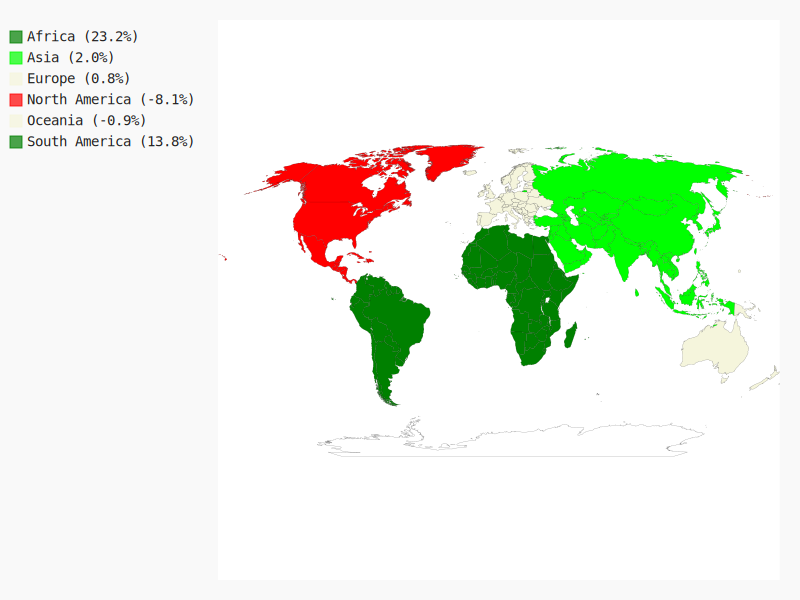

In [36]:
show_svg()

Also investigated was where not the change but instead where are users predominantly located (as of the most recent year investigated which in this case was 2021)

In [37]:
from IPython.display import SVG
def show_svg():
    return SVG('WhereUsersLive.svg')

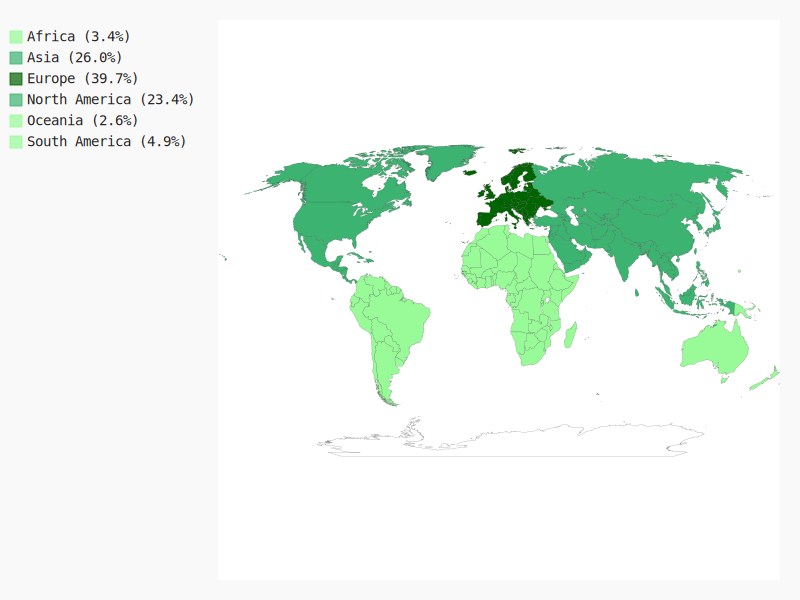

In [38]:
show_svg()

## Q3.3 Visualisation Summary


Where stackoverflow users live is also changing. While historically their users have been primarily located in Europe / North America and Asia there has been big changes in this demographic breakdown over the last 4 years. Over this time there has been a large (~8%) decrease in the users in North America with both Africa and South America seeing large increases of ~23% and ~14% respectively.